# Intall python packages

1. using `%` notation to install some python packages.
2. ex
```bash
%pip intsall matplotlib
```

In [2]:
%pip install matplotlib
%pip install scipy
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Problem 1: Rotation Matrix from Roll-Pitch-Yaw

Given a set of Roll-Pitch-Yaw angles $(\phi,\theta,\psi)$, where $\phi$ is the roll angle around the x-axis, $\theta$ is the pitch angle around the y-axis, and $\psi$ is the yaw angle around the z-axis, your task is to write a Python function that computes the corresponding rotation matrix $R$. Use the following equations for your implementation:

$R = R_z(\psi)R_y(\theta)R_x(\phi)$,

where $R_x(\phi)$, $R_y(\theta)$ and $R_z(\psi)$ are the rotation matrices around the x, y, and z axes, respectively. The matrices are defined as:

$R_x(\phi)=\begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\phi) & -sin(\phi) \\ 0 & sin(\phi) & cos(\phi) \end{bmatrix}$

$R_y(\theta)=\begin{bmatrix} cos(\theta) & 0 & sin(\theta) \\ 0 & 1 & 0 \\ -sin(\theta) & 0 & cos(\theta) \end{bmatrix}$

$R_z(\psi)=\begin{bmatrix} cos(\psi) & -sin(\psi) & 0 \\sin(\psi) & cos(\psi) & 0 \\ 0 & 0 & 1 \end{bmatrix}$

Validate your solution by visualizing the axes of the original and rotated frames.

Rotation Matrix:
 [[ 0.35355339 -0.5732233   0.73919892]
 [ 0.61237244  0.73919892  0.28033009]
 [-0.70710678  0.35355339  0.61237244]]


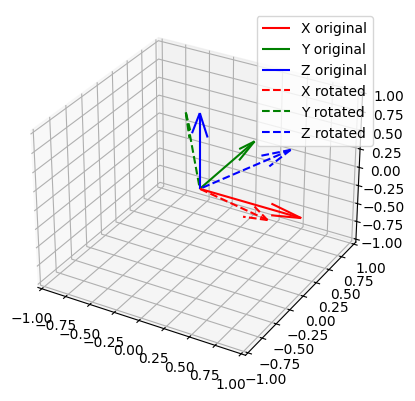

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def create_rotation_matrix(roll: int, pitch: int, yaw: int):
    """
    Create a rotation matrix from Roll, Pitch, Yaw angles.

    Args:
    `roll`, `pitch`, `yaw` (`float`): Roll, Pitch, Yaw angles in radians.

    Returns:
    `numpy.ndarray`: A `3x3` rotation matrix.
    """
    # Transform deg into radian
    roll = np.radians(roll)
    pitch = np.radians(pitch)
    yaw = np.radians(yaw)

    R_x = np.array(
        [
            [1, 0, 0],
            # ----------
            [0, np.cos(roll), -np.sin(roll)],
            # ----------
            [0, np.sin(roll), np.cos(roll)],
        ]
    )
    R_y = np.array(
        [
            [np.cos(pitch), 0, np.sin(pitch)],
            # ----------
            [0, 1, 0],
            # ----------
            [-np.sin(pitch), 0, np.cos(pitch)],
        ]
    )
    R_z = np.array(
        [
            [np.cos(yaw), -np.sin(yaw), 0],
            # ----------
            [np.sin(yaw), np.cos(yaw), 0],
            # ----------
            [0, 0, 1],
        ]
    )

    # Rotation matrix = Rz∙Ry∙Rx
    R = np.dot(R_z, np.dot(R_y, R_x))

    return R


def rotate_vec_3D(
    vec: np.ndarray[np.float64], roll: int, pitch: int, yaw: int
) -> np.ndarray[np.float64]:
    # Roll, Pitch, and Yaw rotation matrices
    # | Roll  =  [x]  axis |
    # | Pitch =  [y]  axis |
    # | Yaw   =  [z]  axis |
    R = create_rotation_matrix(roll, pitch, yaw)

    # | Rotate the vector  |
    # |  R • target_vec    |
    rotated_vec = np.dot(R, vec)

    return rotated_vec


# Example usage
roll, pitch, yaw = 30, 45, 60
Rotaion = rotate_vec_3D(np.eye(3), roll=roll, pitch=pitch, yaw=yaw)

print("Rotation Matrix:\n", Rotaion)


# Visualization
def visualize_rotation(R):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    # Initial unit vectors
    vectors = np.eye(3)
    ax.quiver(
        0,
        0,
        0,
        vectors[0, 0],
        vectors[1, 0],
        vectors[2, 0],
        color="r",
        label="X original",
    )
    ax.quiver(
        0,
        0,
        0,
        vectors[0, 1],
        vectors[1, 1],
        vectors[2, 1],
        color="g",
        label="Y original",
    )

    ax.quiver(
        0,
        0,
        0,
        vectors[0, 2],
        vectors[1, 2],
        vectors[2, 2],
        color="b",
        label="Z original",
    )
    # Rotated vectors
    rotated_vectors = R @ vectors
    ax.quiver(
        0,
        0,
        0,
        rotated_vectors[0, 0],
        rotated_vectors[1, 0],
        rotated_vectors[2, 0],
        color="r",
        linestyle="dashed",
        label="X rotated",
    )
    ax.quiver(
        0,
        0,
        0,
        rotated_vectors[0, 1],
        rotated_vectors[1, 1],
        rotated_vectors[2, 1],
        color="g",
        linestyle="dashed",
        label="Y rotated",
    )
    ax.quiver(
        0,
        0,
        0,
        rotated_vectors[0, 2],
        rotated_vectors[1, 2],
        rotated_vectors[2, 2],
        color="b",
        linestyle="dashed",
        label="Z rotated",
    )

    ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
    ax.legend()
    plt.show()


visualize_rotation(Rotaion)

### Problem 2: Finding Roll-Pitch-Yaw from Rotation Matrix
Given a rotation matrix $R$, determine the corresponding Roll-Pitch-Yaw angles $(\phi,\theta,\psi)$. The equations relating the matrix elements to the angles are:

$Roll(x)  =  \phi = arctan2(R_{32}, R_{33})$

$Pitch(y) = \theta = arcsin(-R_{31})$

$Yaw(z)   = \psi = arctan2(R_{21}, R_{11})$

$R_{21}$ = Rotation matrix `row[2] col[1]`

Which is same as

```python
vector = np.zeros(3,3)

R_21 = vector[1,0]
```

Write a Python function that takes in a rotation matrix and outputs the Roll-Pitch-Yaw angles. Test your function with a known set of angles and rotation matrix, and visualize the result to ensure correctness.

In [11]:
# Use the rotation matrix from Problem 1 as an example
def extract_roll_pitch_yaw(roll: int, pitch: int, yaw: int) -> tuple[int, int, int]:
    rotation_matrix = create_rotation_matrix(roll, pitch, yaw)
    print(rotation_matrix)
    print(rotation_matrix[2, 1])
    roll = np.rad2deg(np.arctan2(rotation_matrix[2, 1], rotation_matrix[2, 2]))
    pitch = np.rad2deg(np.arcsin(-rotation_matrix[2, 0]))
    yaw = np.rad2deg(np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0]))

    return (roll, pitch, yaw)


res = extract_roll_pitch_yaw(40, 50, 60)
print("Recovered Roll-Pitch-Yaw angles (degrees):", res[0], res[1], res[2])

[[ 0.3213938  -0.41721201  0.85008244]
 [ 0.5566704   0.80945649  0.18681076]
 [-0.76604444  0.41317591  0.49240388]]
0.4131759111665348
Recovered Roll-Pitch-Yaw angles (degrees): 40.0 50.0 59.99999999999999


### Problem 3: Quaternion to Rotation Matrix Conversion

## Quaternion

youtube 영상

https://www.youtube.com/watch?v=zjMuIxRvygQ

![](./images/quaternion.png)

Quaternions offer a compact way to represent rotations. Given a unit quaternion $q=(w,x,y,z)$, write a Python function to convert it into a corresponding rotation matrix $R$. The relation is given by:

$R=\begin{bmatrix} 1-2y^2 - 2z^2 & 2xy-2zw & 2xz+2yw \\ 2xy+2zw & 1-2x^2-2z^2 & 2yz - 2xw \\ 2xz - 2yw & 2yz+2xw & 1-2x^2-2y^2 \end{bmatrix}$

Ensure the quaternion is normalized before conversion. Demonstrate the correctness of your function through visualization.

Quaternion: 0.7071067811865476 0.0 0.7071067811865475 0.0
Rotation Matrix from Quaternion:
 [[ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  2.22044605e-16]]


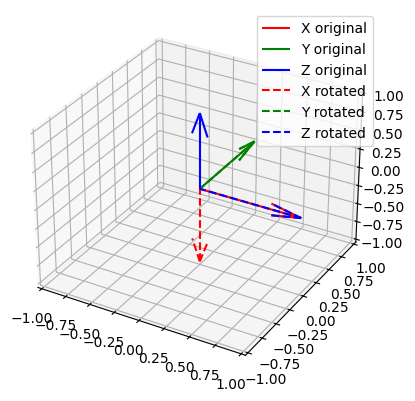

In [5]:
# 쿼터니언 클래스 정의
class Quaternion:
    def __init__(self, w, x, y, z):
        self.w = w
        self.x = x
        self.y = y
        self.z = z
        self.vec = np.array([w, x, y, z])

    def rotate(self, point):
        q_point = Quaternion(0, *point)
        q_conj = Quaternion(self.w, -self.x, -self.y, -self.z)
        q_rotated = self * q_point * q_conj
        return np.array([q_rotated.x, q_rotated.y, q_rotated.z])

    def __mul__(self, other):
        if isinstance(other, Quaternion):
            return Quaternion(
                self.w * other.w
                - self.x * other.x
                - self.y * other.y
                - self.z * other.z,
                self.w * other.x
                + self.x * other.w
                + self.y * other.z
                - self.z * other.y,
                self.w * other.y
                - self.x * other.z
                + self.y * other.w
                + self.z * other.x,
                self.w * other.z
                + self.x * other.y
                - self.y * other.x
                + self.z * other.w,
            )
        else:
            return Quaternion(
                self.w * other, self.x * other, self.y * other, self.z * other
            )

    def __add__(self, other):
        return Quaternion(
            self.w + other.w, self.x + other.x, self.y + other.y, self.z + other.z
        )

    def norm(self):
        w, x, y, z = self.w, self.x, self.y, self.z
        norm = np.linalg.norm([w, x, y, z])

        return Quaternion(w / norm, x / norm, y / norm, z / norm)


# 각도에서 쿼터니언 생성 함수
def create_quaternion_from_axis_angle(axis, angle):
    axis = axis / np.linalg.norm(axis)
    w = np.cos(angle / 2)
    x, y, z = axis * np.sin(angle / 2)
    return Quaternion(w, x, y, z)


# Example quaternion (normalized)
def create_rotation_matrix_from_quaternion(q: Quaternion):
    W, X, Y, Z = q.norm().vec

    R = np.array(
        [
            [1 - 2 * Y**2 - 2 * Z**2, 2 * X * Y - 2 * Z * W, 2 * X * Z + 2 * Y * W],
            # ----------
            [2 * X * Y + 2 * Z * W, 1 - 2 * X**2 - 2 * Z**2, 2 * Y * Z - 2 * X * W],
            # ----------
            [2 * X * Z - 2 * Y * W, 2 * Y * Z + 2 * X * W, 1 - 2 * X**2 - 2 * Y**2],
        ]
    )
    return R


# 쿼터니언 정의 (예: Y축을 중심으로 45도 회전)
quaternion = create_quaternion_from_axis_angle(
    axis=np.array([0, 1, 0]), angle=np.pi / 2
)

print("Quaternion:", quaternion.w, quaternion.x, quaternion.y, quaternion.z)

transformation_matrix = create_rotation_matrix_from_quaternion(quaternion)

print("Rotation Matrix from Quaternion:\n", transformation_matrix)

visualize_rotation(transformation_matrix)

### Problem 4: Slerp (Spherical Linear Interpolation) between Quaternions

Slerp란 두 vector에 대해 Spherical shape로 최단거리로 보간(연결) 시키는 것

이때 t는 최단 거리의 보간 비율( 0 ~ 1 사이임 )

![slerp](./images/slerp.jpeg)

Given two unit quaternions $q_1$ and $q_2$, representing the start and end orientations, and a fraction $t\in[0,1]$, implement the Slerp algorithm to find the intermediate quaternion $q_t$ that represents the orientation at fraction $t$ between the two orientations. The Slerp formula is:

$q_t = \frac{sin((1-t)\Omega)}{sin(\Omega)}q_{1} + \frac{sin(t\Omega)}{sin(\Omega)}q_{2}$

where $\Omega = {arccos(q_1^{\intercal}q_{2})}$ is the dot product of the quaternions.

Validate your solution by interpolating between two known orientations and visualizing the intermediate orientations.

Interpolated Quaternion: <__main__.Quaternion object at 0x105fcc2e0>
Rotation Matrix from Slerp Interpolated Quaternion:
 [[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]


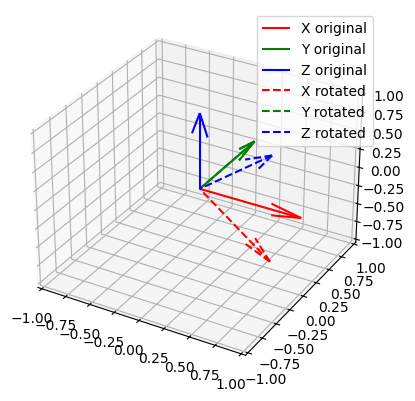

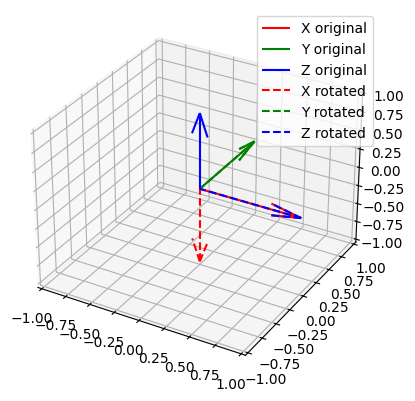

In [6]:
# Example quaternions and interpolation


def slerp(q1: Quaternion, q2: Quaternion, t: float) -> Quaternion:
    dot = q1.vec @ q2.vec

    if dot < 0.0:
        q2 = Quaternion(-q2.w, -q2.x, -q2.y, -q2.z)
        dot = -dot

    DOT_THRESHOLD = 0.9995
    # If the inputs are too close for comfort, linearly interpolate
    if dot > DOT_THRESHOLD:
        result = Quaternion(
            q1.w + t * (q2.w - q1.w),
            q1.x + t * (q2.x - q1.x),
            q1.y + t * (q2.y - q1.y),
            q1.z + t * (q2.z - q1.z),
        )
        return result.normalize()

    # Since dot is in range [0, DOT_THRESHOLD], acos is safe
    theta_0 = np.arccos(dot)
    theta = theta_0 * t

    q2_a: Quaternion = Quaternion(
        q2.w - q1.w * dot, q2.x - q1.x * dot, q2.y - q1.y * dot, q2.z - q1.z * dot
    ).norm()

    slerped_quaternion: Quaternion = (q1 * np.cos(theta) + q2_a * np.sin(theta)).norm()

    return slerped_quaternion


# Zero rotation quaternion
q1 = Quaternion(1, 0, 0, 0)
# Rotate 90 degrees around the Y-axis quaternion
q2 = create_quaternion_from_axis_angle(axis=np.array([0, 1, 0]), angle=np.pi / 2)
t = 0.5  # Halfway between q1 and q2

qt = slerp(q1, q2, t)

rotation_from_slerped_quaterion = create_rotation_matrix_from_quaternion(qt)
print("Interpolated Quaternion:", qt)
print(
    "Rotation Matrix from Slerp Interpolated Quaternion:\n",
    rotation_from_slerped_quaterion,
)

visualize_rotation(rotation_from_slerped_quaterion)
visualize_rotation(transformation_matrix)

### Problem 5: Angular Velocity Vector to Skew-Symmetric Matrix
Given an angular velocity vector $\omega = [\omega_x, \omega_y, \omega_z]^{\intercal}$, your task is to write a Python function that converts this vector into its corresponding skew-symmetric matrix $[\omega]_{\times}$. The skew-symmetric matrix is used in computing cross products and is defined as:

$[\omega]_{\times}=\begin{bmatrix} 0 & -\omega_z & \omega_y \\ \omega_z & 0 & -\omega_x \\ -\omega_y & \omega_x & 0 \end{bmatrix}$

This matrix is crucial in representing angular velocities in rigid body dynamics and robotics.

In [7]:
def create_skew_from_ang_vel(omega: np.ndarray[np.float64]):
    WX, WY, WZ = omega
    skew_symmatrix_matrix = np.array(
        [
            [0, -WZ, WY],
            ##
            [WZ, 0, -WX],
            ##
            [-WY, WX, 0],
        ]
    )
    return skew_symmatrix_matrix


# Example usage
omega = np.array([1, 2, 3])
skew_symmetric_matrix = create_skew_from_ang_vel(omega)
print("Skew-Symmetric Matrix:\n", skew_symmetric_matrix)

Skew-Symmetric Matrix:
 [[ 0 -3  2]
 [ 3  0 -1]
 [-2  1  0]]


### Problem 6: Exponential Map for Rotation

Given an angular velocity vector $\omega$ and a time duration $t$, calculate the rotation matrix $R$ using the exponential map. The exponential map converts an angular velocity vector into a rotation matrix over the time $t$, assuming constant angular velocity. The rotation matrix $R$ can be obtained using Rodrigues' formula:

$R=\exp([\omega]_{\times}t) = I + sin(\theta)[\omega]_{\times} + (1-cos(\theta))[\omega]_{\times}^{2}$

where $\theta = \|\omega\| t$ is the magnitude of rotation, $I$ is the identity matrix, and $[\omega]_{\times}$ is the skew-symmetric matrix of $\omega$.

Rotation Matrix:
 [[-0.47492144  0.32944181  0.81603782]
 [ 0.85049534  0.41003142  0.32944181]
 [-0.22606924  0.85049534 -0.47492144]]


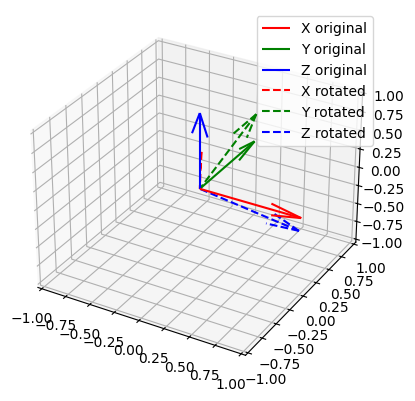

In [8]:
def create_rotation_matrix_from_exponential_map(omega: np.ndarray[np.float64], t: int):
    # omega는 반드시 정규화되어야 함
    omega_normalized = omega / np.linalg.norm(omega)

    # [w] = skew symmetric matrix for omega
    Skew_W = create_skew_from_ang_vel(omega_normalized)

    # theta = 각속도 * 시간
    theta = np.linalg.norm(omega) * t

    rotation_matrix = (
        np.eye(3)
        + np.sin(theta) * Skew_W
        + (1 - np.cos(theta)) * np.dot(Skew_W, Skew_W)
    )

    return rotation_matrix


# Example usage
omega = np.array([0.5, 1, 0.5])
t = 2  # seconds
Rotaion = create_rotation_matrix_from_exponential_map(omega, t)
print("Rotation Matrix:\n", Rotaion)

visualize_rotation(Rotaion)

### Problem 7: Constructing Homogeneous Transformation Matrices

Given a rotation matrix $R$ that represents the orientation of a rigid body and a position vector $p$ that represents the location of the body frame's origin in the world frame, construct the corresponding homogeneous transformation matrix $T$.

A homogeneous transformation matrix combines both rotation and translation information into a single 4x4 matrix:

$T=\begin{bmatrix} R & p \\ 0 & 1 \end{bmatrix}$

In [9]:
def create_homogeneous_transform(R, p):
    """
    Create a homogeneous transformation matrix from a rotation matrix and a position vector.

    Parameters:
    R (`numpy.ndarray`): A `3x3` rotation matrix.
    p (`numpy.ndarray`): A `3x1` position vector.

    Returns:
    `numpy.ndarray`: A `4x4` homogeneous transformation matrix.
    """
    if R.shape != (3, 3):
        raise ValueError("Rotation matrix R must be 3x3.")
    if p.shape != (3,):
        raise ValueError("Position vector p must be 3-dimensional.")

    # T =
    # | R  p |
    # | 0. 1 |

    # Step1: T = zeros((4, 4))
    T = np.zeros((4, 4))

    # Step2: T[:3, :3] = R -> 3 x 3 ~ Rotation matrix
    T[:3, :3] = R

    # Step3: T[:3, 3] = 3x3 ~ column selection
    T[:3, 3] = p

    # Step4: T(4, 4) = 1
    T[3, 3] = 1

    return T


# Example usage
Rotaion = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
P = np.array([1, 2, 3])
Twist = create_homogeneous_transform(Rotaion, P)
print("Homogeneous Transformation Matrix:\n", Twist)

Homogeneous Transformation Matrix:
 [[ 0. -1.  0.  1.]
 [ 1.  0.  0.  2.]
 [ 0.  0.  1.  3.]
 [ 0.  0.  0.  1.]]


### Problem 8: Exponential Coordinates for Rigid-Body Motion

Given a **twist vector** $\xi = [\omega;v]$ representing a rigid body's screw motion and a scalar $\theta$ representing the motion magnitude (e.g., rotation angle and translation distance for a screw motion), compute the corresponding homogeneous transformation matrix using the exponential map:

twist vector = xi = transpose([`각속도`, `병진속도`])

$T=\exp(\hat{\xi}\theta)$

where $\hat{\xi}$ is the 4x4 matrix representation of the twist and $\theta$ is the motion magnitude.

1.__Compute the Homogeneous Transformation Matrix__: Compute the homogeneous transformation matrix, $T$, that encapsulates the rigid body's rotation and translation in 3D space.

2.__Visualize the Transformation__: Using matplotlib, create a 3D visualization that shows both the original position of the rigid body (as a semi-transparent unit cube) and its transformed position. Highlight the transformation effect by altering the appearance (e.g., color) of the transformed rigid body.

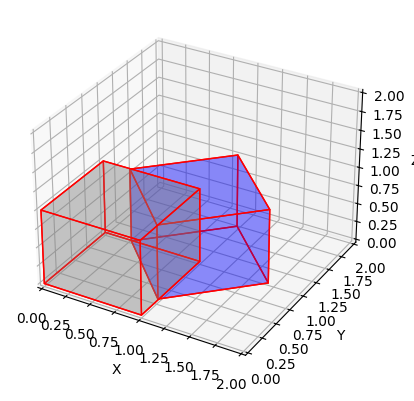

In [10]:
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def draw_cube(ax, T, color="blue"):
    """
    Draw a cube transformed by the homogeneous transformation matrix T.
    """
    # Vertices of a cube
    v = np.array(
        [
            [0, 0, 0, 1],
            [1, 0, 0, 1],
            [1, 1, 0, 1],
            [0, 1, 0, 1],
            [0, 0, 1, 1],
            [1, 0, 1, 1],
            [1, 1, 1, 1],
            [0, 1, 1, 1],
        ]
    )
    # Apply transformation
    v_transformed = np.dot(v, T.T)[:, :3]

    # Define the sides of the cube, each as a list of vertices
    verts = [
        [v_transformed[0], v_transformed[1], v_transformed[2], v_transformed[3]],
        [v_transformed[4], v_transformed[5], v_transformed[6], v_transformed[7]],
        [v_transformed[0], v_transformed[1], v_transformed[5], v_transformed[4]],
        [v_transformed[2], v_transformed[3], v_transformed[7], v_transformed[6]],
        [v_transformed[1], v_transformed[2], v_transformed[6], v_transformed[5]],
        [v_transformed[4], v_transformed[7], v_transformed[3], v_transformed[0]],
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(verts, alpha=0.25, linewidths=1, edgecolors="r")
    poly3d.set_facecolor(color)
    ax.add_collection3d(poly3d)


def twist_to_transformation(omega, v, theta):
    """
    Compute the homogeneous transformation matrix for a given twist and angle
    회전속도: w
    병진속도: v
    각도: theta

    # @ = dot product
    # A.B == np.dot(A, B) == A @ B

    Twist = e[S] * theta =
    [
        e[w] * theta = Rotaion  P
        0                       1
    ]
    P = ((I * theta) + (1 - cos(theta)) * w + (theta - sin(theta)) * w^2) @ v
    """
    # Step1. rotation matrix 계산 from omega & theta
    Rotaion = create_rotation_matrix_from_exponential_map(
        omega, theta
    )  # Rotation matrix from exponential map of omega

    # Step2. translation vector 계산 from v, theta
    P = (
        # I * theta
        np.eye(3) * theta
        +
        # (1 - cos(theta)) * R
        (1.0 - np.cos(theta)) * Rotaion
        +
        # (theta - sin(theta)) * R^2
        (theta - np.sin(theta)) * Rotaion @ Rotaion
    ) @ v

    Twist = np.eye(4)
    Twist[:3, :3] = Rotaion
    Twist[:3, 3] = P

    return Twist


def visualize_transformation(omega, v, theta):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    T = twist_to_transformation(omega, v, theta)

    draw_cube(ax, np.eye(4), "grey")  # Original cube in grey
    draw_cube(ax, T, "blue")  # Transformed cube in blue

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_zlim([0, 2])
    plt.show()


# Example usage

# Rotation about z-axis
omega = np.array([0, 0, 1])
# Translation along x-axis
v = np.array([1, 0, 0])
# Rotation angle (45 degrees)
theta = np.pi / 4

visualize_transformation(omega, v, theta)